# Open Exploration Visualization

In [1]:
from exploration import *
import os
%matplotlib inline

## Directory

In [2]:
parent_directory = os.path.dirname(os.getcwd())
target_directory = parent_directory + '/exploration/results/'

## Parameters

In [3]:
# Define relevant outcome variables (time series)
outcome_names = [
    'Distance to consumption threshold',
    'Distance to damage threshold',
    'Population below consumption threshold',
    'Population above damage threshold',
    'Utility',
    'Disutility'
]

## Load Experiments

In [4]:
file_name = 'test_results_sufficientarian_with_extra_lever'
results = load_results(file_name=target_directory + file_name)

## Looking at Results

In [5]:
experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)

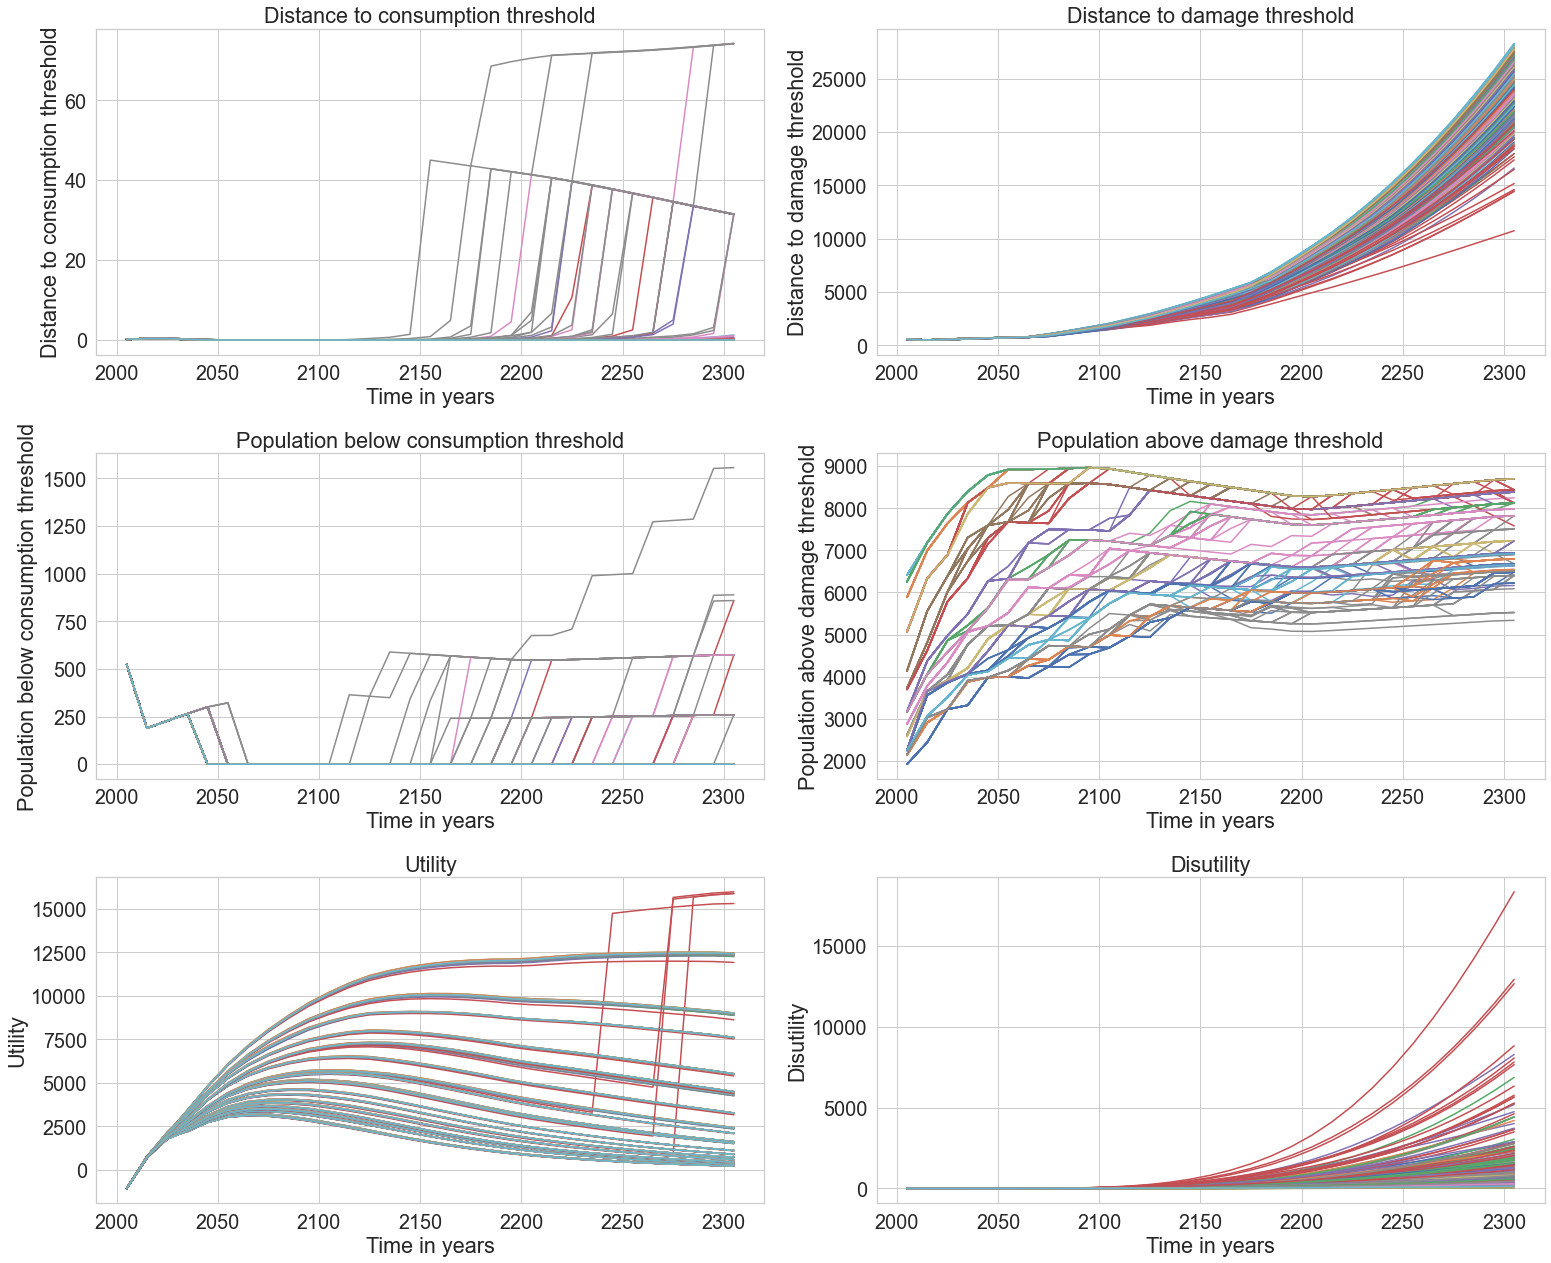

In [6]:
plot_pathways(outcomes, outcome_names)

In [11]:
experiments.loc[:, 'irstp_damage'].describe()

count    400.000000
mean       0.007886
std        0.004129
min        0.001147
25%        0.004587
50%        0.007781
75%        0.011348
max        0.014960
Name: irstp_damage, dtype: float64